## Creating the Application

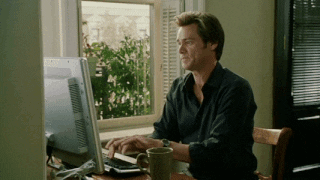

_"The algorithm should be delivered within a Python or R notebook. It should be functional with a data format containing only the geometric dimensions."_

_"Therefore, the algorithm should be able to take as input a file containing the dimensions of multiple banknotes and determine the type of each one based solely on the dimensions."_

_"We provide the typical format of our banknote files with which the algorithm is supposed to work, in a file named billets_production.csv."_

The algorithm will be delivered within this Notebook, taking the form of a Python function that takes as input a file containing the dimensions of multiple banknotes.

In [124]:
# Insert the new document here:

Nouveau_fichier= pd.read_csv("billets_production (1).csv")

In [125]:
pd.set_option('display.max_rows', 1000)
#By setting `pd.set_option('display.max_rows', 1000)`, up to 1000 rows will be displayed in the DataFrame.

def predict_banknotes(df, threshold=0.5):
    """
   Predicts the probability that each banknote is genuine using logistic regression.

    Args:
    df: a dataframe containing the dimensions of multiple banknotes
    threshold: a threshold (between 0 and 1) for binary prediction (optional, default 0.5)

    Returns:
    DataFrame: The same dataframe augmented with two new columns containing:
    - The probabilities that each banknote is genuine (in percent)
    - A Boolean value True for a genuine banknote and False for a counterfeit banknote.
        
    """
    
    
   
    # Creating the New Data for Prediction:
    Nouvelles_données = df[["diagonal","height_left","height_right", "margin_low","margin_up", "length"]]
       
    # Making Predictions on the New Data
    y_pred = lr.predict(Nouvelles_données)
    y_pred_proba = lr.predict_proba(Nouvelles_données)[:, 1]
    
       
    # Applying the Binary Prediction Threshold
    
    y_pred_binary = np.where(y_pred_proba > threshold, 'True', 'False')
    
    # Creating the New Columns
    df["Authenticité du billets"]=y_pred_binary
    df["Prob. que le billet soit vrai"]= np.round(y_pred_proba*100, 2)
    
    
      # Returning the List of Predictions
    return df
    

In [126]:
Nouveau_fichier.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [128]:
predict_banknotes(Nouveau_fichier,0.5)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Authenticité du billets,Prob. que le billet soit vrai
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.67
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.14
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.17
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,91.25
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,99.96
